10. Ver adjunto "Solucion 10"

15.

a) Halle los ceros de los primeros 20 polinomios de Legendre.

b) Halle los pesos de ponderacion para los primeros 20 polinomios de Legendre.

In [357]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [358]:
x = sym.Symbol('x', real = True)
Get_Legendre = lambda x, n: sym.diff((x**2-1)**n, x, n)/(sym.factorial(n)*2**n)

In [359]:
#Funcion derivada central
def Derivative(f,x,h=1e-4):
  return (f(x+h)-f(x-h))/(2*h)

In [360]:
#Metodo Newton-Raphson
def GetNewtonMethod(f,xn,itmax=100,precision=1e-8):

  error = 1
  it = 0

  while (error > precision) and (it < itmax):
    try:
      xn1 = xn - f(xn)/Derivative(f,xn)
      error = np.abs(f(xn)/Derivative(f,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1
 # print(it,xn)
  if it == itmax:
    return False
  else:
    return xn

In [361]:
#Retorna lista con las raices de una funcion
def GetAllRoots(f, x, tolerancia = 10):

  Roots = np.array([])

  for i in x:

    root = GetNewtonMethod(f, i)

    if root != False:

      croot = np.round(root, tolerancia)

      if croot not in Roots:
        Roots = np.append(Roots,croot)

  Roots.sort()
  
  if len(Roots) != 0:
    return Roots
  else:
    return np.array([0])

In [362]:
# Primeros 20 polinomios de Legendre:
poly = []
for i in range(1,21):
    poly.append(Get_Legendre(x, i))

In [363]:
#Soporte
X = np.linspace(-1, 1, 100)


In [364]:
for i in range(len(poly)):
    P = lambda y: float(poly[i].subs(x, y))
    Roots = GetAllRoots(P, X)
    print('---')
    print ("\nPolinomio de Legendre {} raices: \n".format(i+1), Roots)
    Weights = []
    for j in Roots:
        Weights.append(round(float(2/((1-j**2)*(Derivative(P, j))**2)), 8))
    print("\nPesos: ", Weights)
        

---

Polinomio de Legendre 1 raices: 
 [0]

Pesos:  [2.0]
---

Polinomio de Legendre 2 raices: 
 [-0.57735027  0.57735027]

Pesos:  [1.0, 1.0]
---

Polinomio de Legendre 3 raices: 
 [-0.77459667 -0.          0.77459667]

Pesos:  [0.55555555, 0.88888892, 0.55555555]
---

Polinomio de Legendre 4 raices: 
 [-0.86113631 -0.33998104  0.33998104  0.86113631]

Pesos:  [0.34785482, 0.6521452, 0.6521452, 0.34785482]
---

Polinomio de Legendre 5 raices: 
 [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]

Pesos:  [0.23692685, 0.47862873, 0.56888894, 0.47862873, 0.23692685]
---

Polinomio de Legendre 6 raices: 
 [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]

Pesos:  [0.17132443, 0.36076165, 0.467914, 0.467914, 0.36076165, 0.17132443]
---

Polinomio de Legendre 7 raices: 
 [-0.94910791 -0.74153119 -0.40584515 -0.          0.40584515  0.74153119
  0.94910791]

Pesos:  [0.12948489, 0.27970548, 0.38183013, 0.41795926, 0.38183013, 0.27970548, 0.12948489]
---

Po

16.

In [365]:
f1 = lambda x: 1/(1+x**4)
f2 = lambda x: 1/(x**2+x**(-2))
# Ver adjunto "Cambio de integral"

In [366]:
def get_integral(f, a, b, n):
    Roots, Weights = np.polynomial.legendre.leggauss(n)
    integral = 0
    for i in range(n):
        integral += Weights[i]*f(0.5*(((b-a)*Roots[i])+a+b))
    return 0.5*(b-a)*integral

f = get_integral(f1, 0, 1, 20) + get_integral(f2, -1, 0, 20)
print(f)
    

1.1107207345395917


17.

In [367]:
b_b = lambda x: (x**3)/((np.e**x)-1)

def get_laguerre_integral(f, n):
    Roots, Weights = np.polynomial.laguerre.laggauss(n)
    integral = 0
    for i in range(n):
        integral += Weights[i]*(np.e**Roots[i])*f(Roots[i])
    return integral

In [368]:
# Compute this integral using the Gauss-Laguerre quadrature method for n=3 evaluation points
print(get_laguerre_integral(b_b, 3))

6.481130171540027


In [369]:
'''
For this estimation, plot the relative error (ϵr(n) = Iestimated(n)/Iexact) as a function
of the evaluation points, with n = [2, 3, ..., 10]
'''
def error(n):
    return get_laguerre_integral(b_b, n)/(np.pi**4/15)

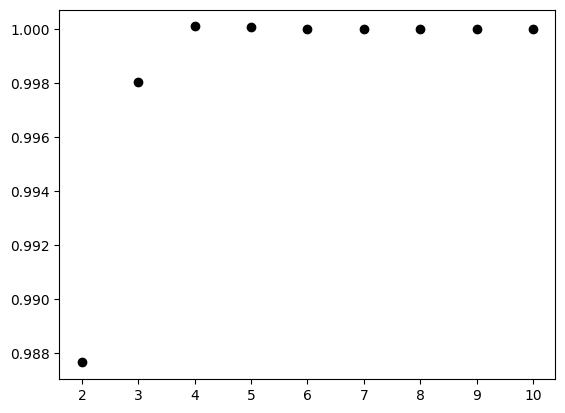

In [370]:
n = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in n:
    plt.scatter(i, error(i), color = 'k')
plt.show()

21.

a) (Theoretical) Usando las relaciones de ortogonalidad de los polinomios de Legendre,
muestre que los coeficientes estan dados por

Ver adjunto "polinomios de Legendre"

In [371]:
'''
(b) Implemente la funcion sgn(x).
'''
def sgn(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1

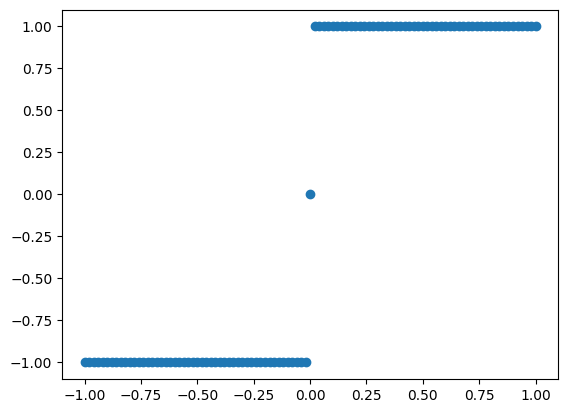

In [372]:
X = np.linspace(-1, 1, 101)
plt.scatter(X, [sgn(i) for i in X])
plt.show()

In [373]:
Roots, Weights = np.polynomial.legendre.leggauss(15)
x = sym.Symbol('x', real = True)

# Primeros 20 polinomios de Legendre:
poly = []

for i in range(20):
    poly.append(Get_Legendre(x, i))

In [374]:
def coeff(n):
    Roots, Weights = np.polynomial.legendre.leggauss(15)
    integral = 0
    for i in range(15):
        integral += Weights[i]*sgn(Roots[i])*(poly[n].subs(x, Roots[i]))
    return integral*(1+2*n)/2

In [375]:
def get_poly (n):
    f = 0
    for i in range(n):
        f += coeff(i)*poly[i]
    return f

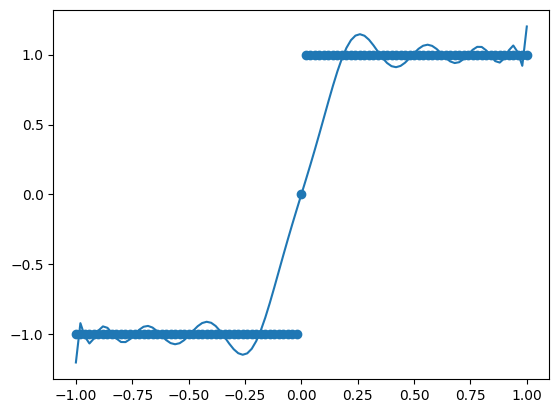

In [376]:
X = np.linspace(-1, 1, 101)
plt.scatter(X, [sgn(i) for i in X])
plt.plot(X, [get_poly(20).subs(x, i) for i in X])
plt.show()

Desafio:

In [435]:
def SimpsonBasico (f, a, b, tol, fa, fb, fc, max_it = 100):
    h = b-a
    c = (a+b)/2
    fd = f((a+c)/2)
    fe = f((c+b)/2)
    S1 = (h/6)*(fa + (4*fc) + fb)
    S2 = (h/12)*(fa + (4*fd) + (2*fc) + (4*fe) + fb)
    if 0 < np.abs(S2-S1) <= tol:
        Q = S2 + (S2-S1)/15
    else:
        Q = SimpsonBasico(f, a, c, tol, fa, fd, fc) + SimpsonBasico(f, c, b, tol, fc, fe, fb)
    return Q

In [447]:
g = lambda x: x**10 - 10*x**8 + 33*x**6 - 40*x**4 + 16*x**2
Area = 2*(SimpsonBasico(g, 0, 1, 10**(-5), f(0), f(1), f(0.5))+SimpsonBasico(g, 1, 2, 10**(-5), f(1), f(2), f(1.5)))
print(Area)

12.14927210431838


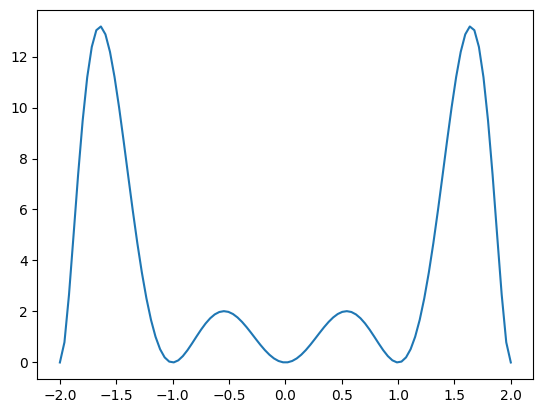

In [433]:
plt.plot(np.linspace(-2, 2, 100), [g(i) for i in np.linspace(-2, 2, 100)])